In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\NIKHIL\py\DS\Model\Data\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [7]:
X = pd.concat([X, geography, gender], axis = 1)
X = X.drop(["Geography", "Gender"], axis = 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [11]:
classifier = Sequential()

#### Sequential.add(Dense(number_of_output_neurons, weight_initializer, activation_function, number_of_input_neurons))

## 1st ANN Model

In [12]:
classifier.add(Dense(units = 6, kernel_initializer = "he_uniform", activation = "relu", input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = "he_uniform", activation = "relu"))
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

In [13]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [14]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5845 - accuracy: 0.7154 - val_loss: 0.5208 - val_accuracy: 0.7781
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4959 - accuracy: 0.7882 - val_loss: 0.4784 - val_accuracy: 0.7921
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4680 - accuracy: 0.7938 - val_loss: 0.4618 - val_accuracy: 0.7948
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4541 - accuracy: 0.7966 - val_loss: 0.4519 - val_accuracy: 0.7967
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4452 - accuracy: 0.8005 - val_loss: 0.4448 - val_accuracy: 0.7989
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4386 - accuracy: 0.8052 - val_loss: 0.4396 - val_accuracy: 0.8016
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4337 - accuracy: 0.8076 - val_loss: 0.4359 - val_accuracy: 0.8058

Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3507 - accuracy: 0.8571 - val_loss: 0.3752 - val_accuracy: 0.8440
Epoch 59/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3500 - accuracy: 0.8554 - val_loss: 0.3750 - val_accuracy: 0.8429
Epoch 60/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3496 - accuracy: 0.8563 - val_loss: 0.3747 - val_accuracy: 0.8425
Epoch 61/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3490 - accuracy: 0.8561 - val_loss: 0.3742 - val_accuracy: 0.8429
Epoch 62/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3484 - accuracy: 0.8565 - val_loss: 0.3740 - val_accuracy: 0.8432
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3479 - accuracy: 0.8567 - val_loss: 0.3738 - val_accuracy: 0.8451
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8576 - val_loss: 0.3734 - val_accuracy:

In [16]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print("Confusion Matrix : \n",cm)
print("Accuracy Score : \n", score)

Confusion Matrix : 
 [[1528   67]
 [ 213  192]]
Accuracy Score : 
 0.86


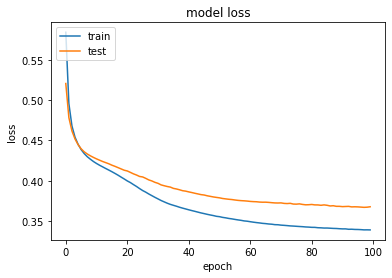

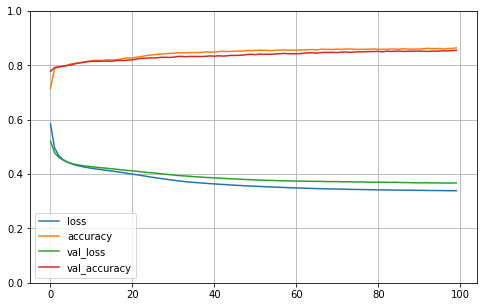

In [18]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## 2nd ANN Model Using More layers and neurons

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

536/536 [==============================] - 2s 4ms/step - loss: 0.4156 - accuracy: 0.8371 - val_loss: 0.4244 - val_accuracy: 0.8281
Epoch 49/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4149 - accuracy: 0.8378 - val_loss: 0.4288 - val_accuracy: 0.8262
Epoch 50/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4151 - accuracy: 0.8365 - val_loss: 0.4264 - val_accuracy: 0.8285
Epoch 51/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4150 - accuracy: 0.8364 - val_loss: 0.4276 - val_accuracy: 0.8258
Epoch 52/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4151 - accuracy: 0.8378 - val_loss: 0.4261 - val_accuracy: 0.8270
Epoch 53/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4147 - accuracy: 0.8369 - val_loss: 0.4264 - val_accuracy: 0.8296
Epoch 54/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4144 - accuracy: 0.8365 - val_loss: 0.4270 - val_accuracy: 0.8281
Epoch

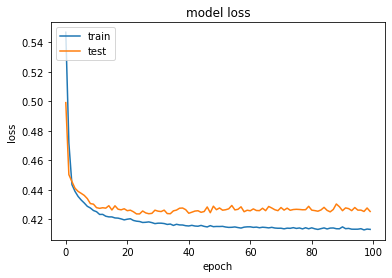

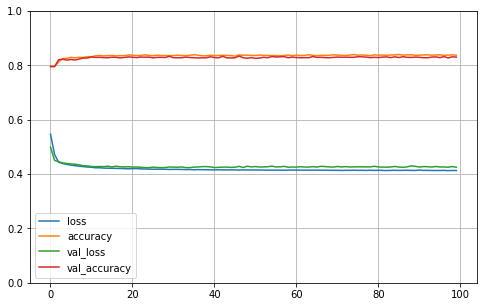

In [19]:
classifier.add(Dense(units = 10, kernel_initializer = "he_normal", activation = "relu", input_dim = 11))
classifier.add(Dense(units = 20, kernel_initializer = "he_normal", activation = "relu"))
classifier.add(Dense(units = 15, kernel_initializer = "he_normal", activation = "relu"))
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

print(classifier.summary())

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print("Confusion Matrix : \n",cm)
print("Accuracy Score : \n", score)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## 3rd ANN Model Using Dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

536/536 [==============================] - 2s 3ms/step - loss: 0.4334 - accuracy: 0.8397 - val_loss: 0.5125 - val_accuracy: 0.8258
Epoch 43/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4332 - accuracy: 0.8391 - val_loss: 0.5087 - val_accuracy: 0.8198
Epoch 44/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4308 - accuracy: 0.8408 - val_loss: 0.5288 - val_accuracy: 0.8167
Epoch 45/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4284 - accuracy: 0.8401 - val_loss: 0.5019 - val_accuracy: 0.8292
Epoch 46/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4314 - accuracy: 0.8410 - val_loss: 0.5261 - val_accuracy: 0.8190
Epoch 47/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4281 - accuracy: 0.8399 - val_loss: 0.5107 - val_accuracy: 0.8285
Epoch 48/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4339 - accuracy: 0.8408 - val_loss: 0.4908 - val_accuracy: 0.8258
Epoch

Epoch 99/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4291 - accuracy: 0.8403 - val_loss: 0.5354 - val_accuracy: 0.8270
Epoch 100/100
63/63 [==============================] - 0s 2ms/step
Confusion Matrix : 
 [[1467  128]
 [ 221  184]]
Accuracy Score : 
 0.8255


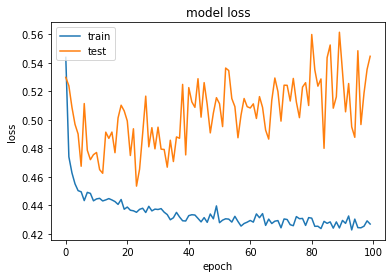

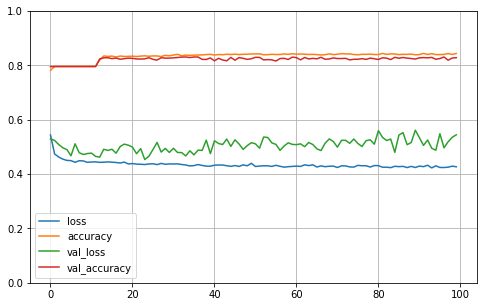

In [20]:
classifier.add(Dense(units = 10, kernel_initializer = "he_normal", activation = "relu", input_dim = 11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 20, kernel_initializer = "he_normal", activation = "relu"))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 15, kernel_initializer = "he_normal", activation = "relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

print(classifier.summary())

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print("Confusion Matrix : \n",cm)
print("Accuracy Score : \n", score)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()